In [1]:
pip install pyrcn

     |████████████████████████████████| 81 kB 2.8 MB/s 


In [12]:
from pyrcn.echo_state_network import ESNRegressor

In [8]:
import pandas as pd
import numpy as np

data = pd.read_csv('/content/BTC-USD.csv')

data = data.drop(labels=range(364, 366), axis=0)

y = data['Close'].values
data=data.drop(columns = ['Close', 'Date'])
X = data.values

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


In [9]:

y=y.reshape(-1, 1)


import numpy as np
X=np.concatenate((X[1:], y[0:-1]), axis=1)

In [10]:
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(X, y[1:], test_size=0.2, shuffle=False, random_state=42)


In [13]:
reg = ESNRegressor()
reg.fit(x_train1, y_train1)

ESNRegressor(input_to_node=InputToNode(), node_to_node=NodeToNode(),
             regressor=IncrementalRegression(), requires_sequence=False)

In [14]:
ypred = reg.predict(x_test1)

In [15]:

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, max_error, mean_squared_log_error, mean_poisson_deviance, mean_gamma_deviance
print('mse: ', mean_squared_error(ypred, y_test1))
print('mae: ', mean_absolute_error(ypred, y_test1))
print('r2_score: ', r2_score(ypred, y_test1))
print('explained_variance_score: ', explained_variance_score(ypred, y_test1))
print('max_error: ', max_error(ypred, y_test1))
#print('mean_squared_log_error: ', mean_squared_log_error(ypred, y_test1))
print('mean_poisson_deviance: ', r2_score(ypred, y_test1))
#print('mean_gamma_deviance: ',  mean_gamma_deviance(ypred, y_test1))


mse:  60137606.83283091
mae:  5980.280032207602
r2_score:  -3.741913896300355
explained_variance_score:  -1.1392875045181166
max_error:  20937.396318449995
mean_poisson_deviance:  -3.741913896300355


In [17]:
#training prediction
xpred=reg.predict(x_train1)
print('mse: ', mean_squared_error(xpred, y_train1))
print('mae: ', mean_absolute_error(xpred, y_train1))
print('r2_score: ', r2_score(xpred, y_train1))
print('explained_variance_score: ', explained_variance_score(xpred, y_train1))
print('max_error: ', max_error(xpred, y_train1))
#print('mean_squared_log_error: ', mean_squared_log_error(xpred, y_train1))
print('mean_poisson_deviance: ', r2_score(xpred, y_train1))
#print('mean_gamma_deviance: ',  mean_gamma_deviance(xpred, y_train1))

mse:  80293223.34073219
mae:  7118.453746107213
r2_score:  -21.691949075392813
explained_variance_score:  -21.691949075392674
max_error:  21926.595758226467
mean_poisson_deviance:  -21.691949075392813


In [18]:
final_pred = []
real=[]
for i in range(len(xpred)):
    final_pred.append(xpred[i][0])
    real.append(y_train1[i][0])

for i in range(len(ypred)):
    final_pred.append(ypred[i][0])
    real.append(y_test1[i][0])

In [19]:
xx=[]
for i in range(len(final_pred)):
    xx.append(i)

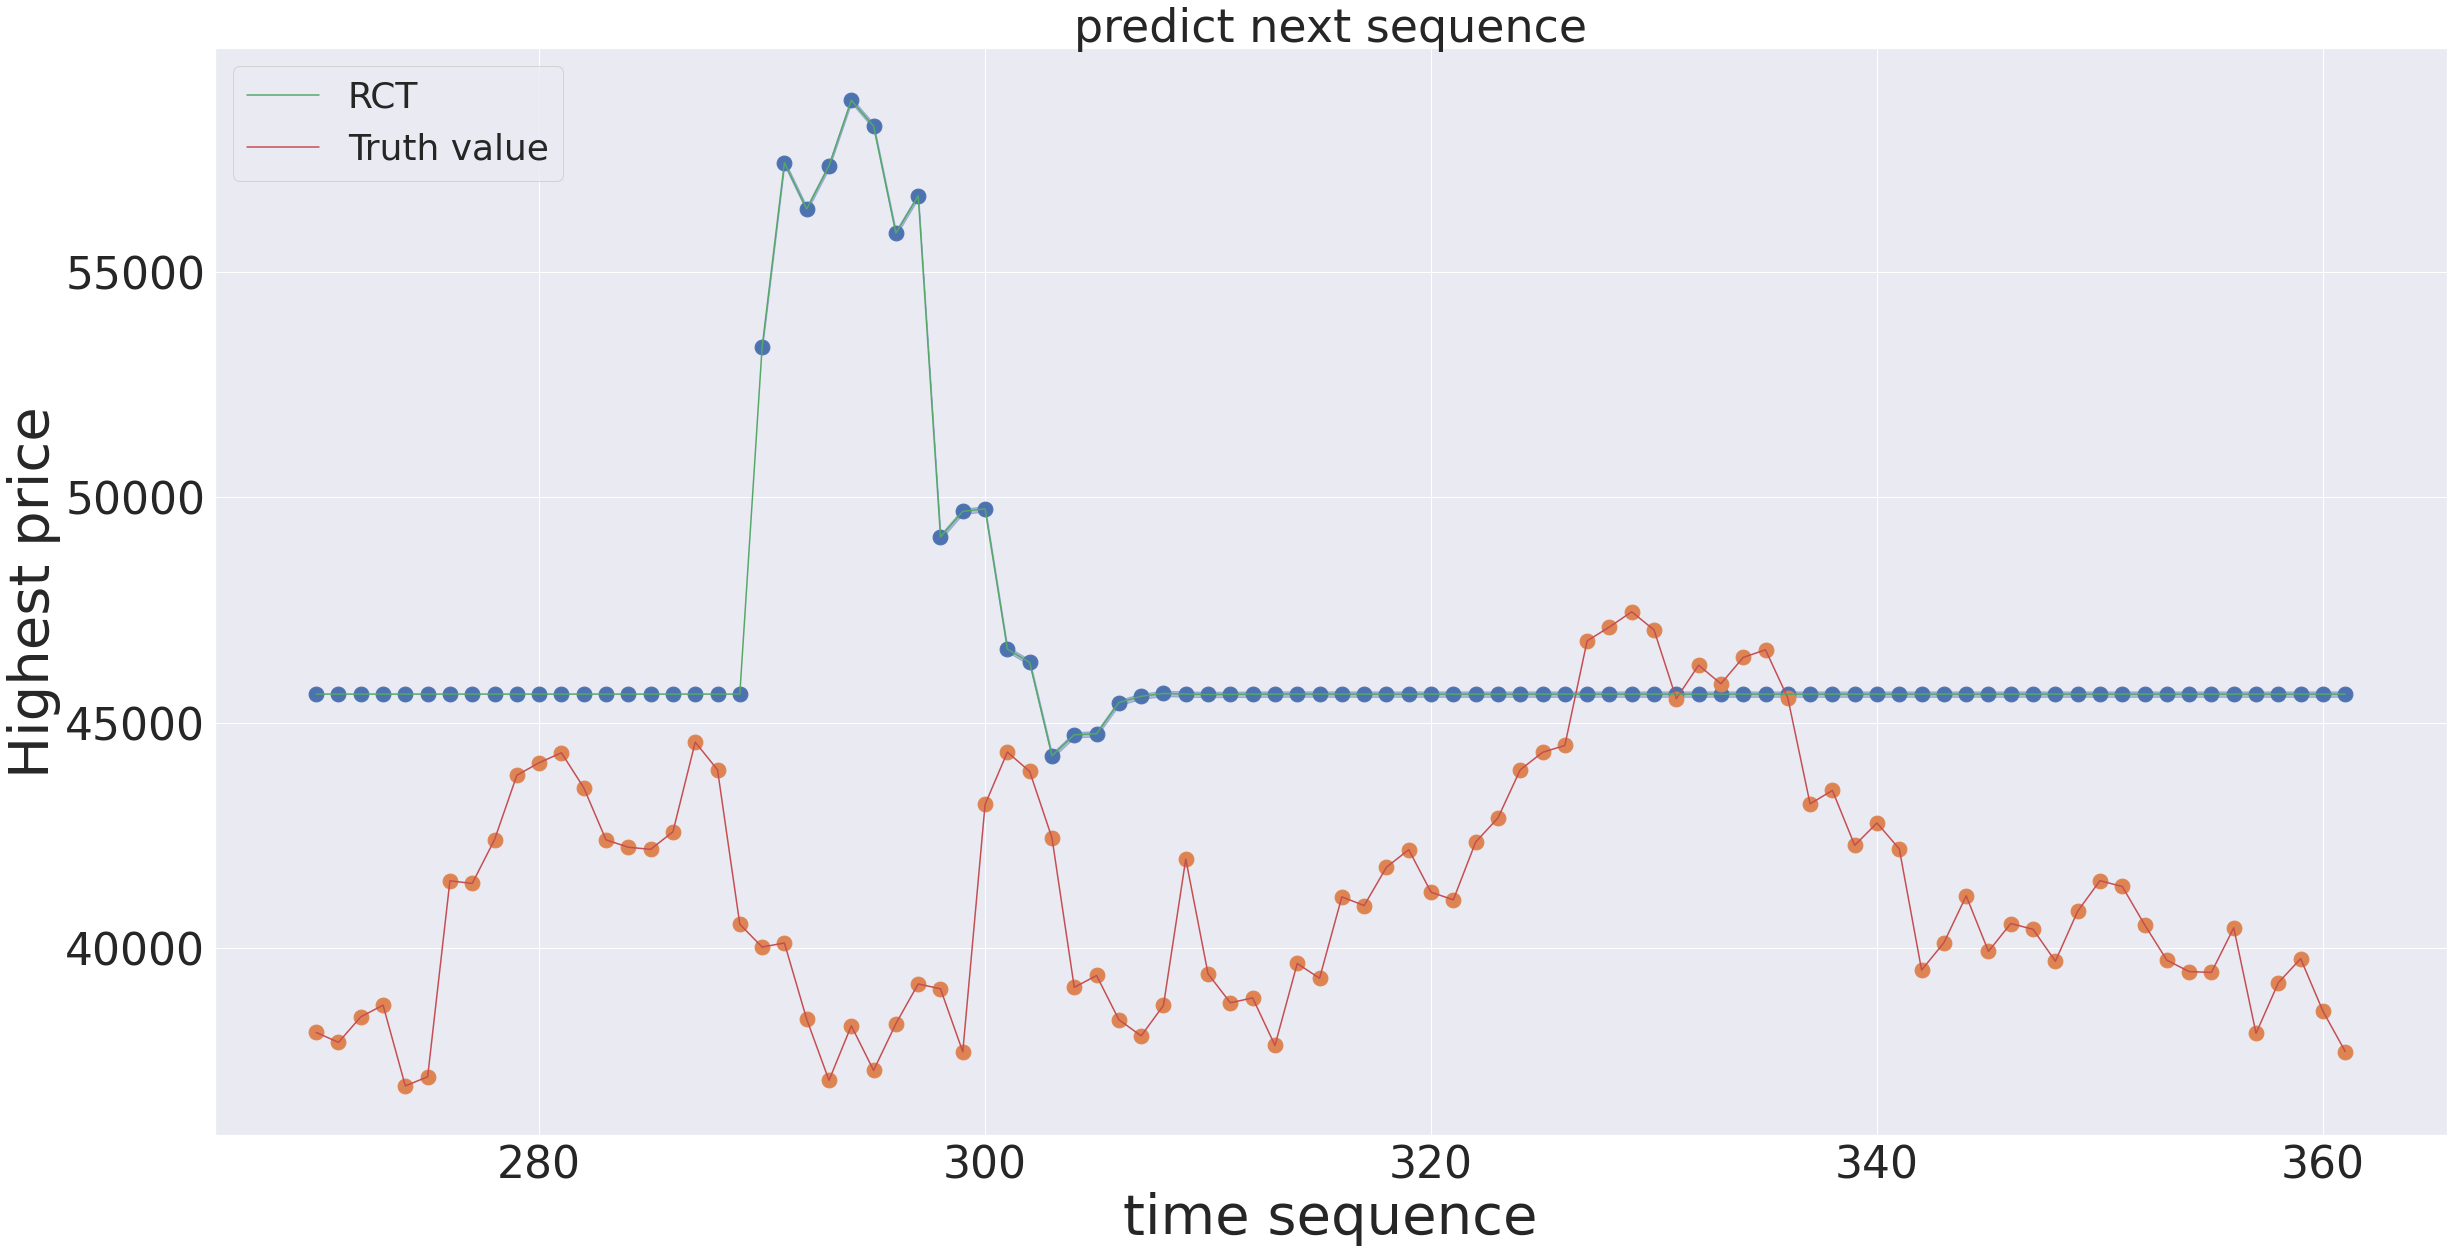

In [20]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [40, 20]
i=270
j=362
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale = 4)
plt.figure()
plt.plot(xx[i:j],final_pred[i:j], color='g', label='RCT', zorder=10)
plt.plot(xx[i:j],real[i:j], color='r', label='Truth value')

plt.scatter(xx[i:j],final_pred[i:j],  s=220, zorder=2)
plt.scatter(xx[i:j],real[i:j],  s=220, zorder=2)
ci = 1200.960 * np.std(final_pred)/np.mean(final_pred)
plt.fill_between(xx[362-72:j], final_pred[362-72:j]-ci, final_pred[362-72:j]+ci, color='b', alpha=.4)

#ax.fill_between(xx[i:j], ypred[i:j], ypred[i:j], color='b', alpha=.1)

plt.legend(loc="upper left", fontsize=36)
plt.title('predict next sequence', fontsize=46)
plt.xlabel('time sequence', fontsize=56)
plt.ylabel('Highest price', fontsize=56)
plt.show()

In [26]:
import csv
  
rows=[]
for i in range(1, len(final_pred)):
    rows.append([final_pred[i], real[i]])  
# field names 
fields = ['predict', 'truth'] 
    

  
with open('ESN_BTC-USD.csv', 'w') as f:
      
    # using csv.writer method from CSV package
    write = csv.writer(f)
      
    write.writerow(fields)
    write.writerows(rows)

In [27]:
rows

[[57423.67740098655, 57424.007813],
 [56396.32440830511, 56396.515625],
 [57355.50621244998, 57356.402344],
 [58807.05151823489, 58803.777344],
 [58233.96663144999, 58232.316406],
 [55861.205050235614, 55859.796875],
 [56688.3683249692, 56704.574219],
 [49125.201309401076, 49150.535156],
 [49692.04171788809, 49716.191406],
 [49748.18737856101, 49880.535156],
 [46636.92998330295, 46760.1875],
 [46341.93976055877, 46456.058594],
 [44272.83176162338, 43537.511719],
 [44739.02795339504, 42909.402344],
 [44760.601146213594, 37002.441406],
 [45453.169230016996, 40782.738281],
 [45592.33874861116, 37304.691406],
 [45654.028523989604, 37536.632813],
 [45641.6230293049, 34770.582031],
 [45632.13430770999, 38705.980469],
 [45633.971286734915, 38402.222656],
 [45639.30748076842, 39294.199219],
 [45640.151052811416, 38436.96875],
 [45641.65353736631, 35697.605469],
 [45640.34404258372, 34616.066406],
 [45640.38171007077, 35678.128906],
 [45640.03848152107, 37332.855469],
 [45640.24979982048, 36684